In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Covid_data.csv")
print(df)

     Gender  Age  Co_Morbid  Admit_date Discharge_date  Remdesivir_Given  \
0         M   46          1  01-09-2021     15-09-2021                 0   
1         M   51          1  03-09-2021     15-09-2021                 1   
2         F   82          1  06-09-2021     15-09-2021                 1   
3         M   51          1  08-09-2021     15-09-2021                 0   
4         M   66          1  09-09-2021     15-09-2021                 0   
...     ...  ...        ...         ...            ...               ...   
1227      F   76          1  25-04-2021     26-04-2021                 0   
1228      F   27          0  16-04-2021     26-04-2021                 0   
1229      M   65          1  14-04-2021     25-04-2021                 0   
1230      F   76          1  15-04-2021     24-04-2021                 0   
1231      F   32          0  19-04-2021     24-04-2021                 1   

      DaysOfStay  DischargeType  Covid_Severity Covid_SeverityDescription  \
0         

In [3]:
# Information Gain - Filter Method
# It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [4]:
# Encode the Categorical data of Gender - using Dummy Column - Creates a new column called Gender_M
# Use Dummy Variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [5]:
print(df.columns)
print(df.columns[0])
# Columns - Age [0], Co_Morbid [1], Admit_date [2], Discharge_date [3], Remdesevir_given [4], 
# DaysofStay [5], DischargeType [6], Covid_Severity [7], 
# Covid_SeverityDescription [8], DischargeTypeCategorical [9], Gender_M [10]

Index(['Age', 'Co_Morbid', 'Admit_date', 'Discharge_date', 'Remdesivir_Given',
       'DaysOfStay', 'DischargeType', 'Covid_Severity',
       'Covid_SeverityDescription', 'DischargeTypeCategorical', 'Gender_M'],
      dtype='object')
Age


In [6]:
X = df.iloc[:,[0,1,4,5,7,10]]   #Age,Co_Morbid, Remdesevir_given, DaysofStay, Covid_Severity,Gender_M
Y = df.iloc[:,[6]]  #DischargeType
X

,Age,Co_Morbid,Remdesivir_Given,DaysOfStay,Covid_Severity,Gender_M
0,46,1,0,14,3,1
1,51,1,1,12,3,1
2,82,1,1,9,3,0
3,51,1,0,7,2,1
4,66,1,0,6,1,1
...,...,...,...,...,...,...
1227,76,1,0,1,2,0
1228,27,0,0,10,1,0
1229,65,1,0,11,4,1
1230,76,1,0,9,3,0


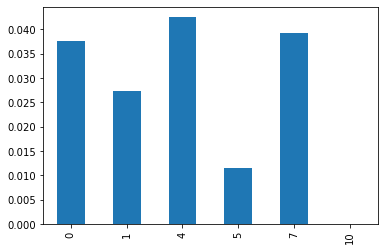

In [7]:
importances = mutual_info_classif(X,Y.values.ravel())
feat_importances = pd.Series(importances,index=[0,1,4,5,7,10])
feat_importances.plot(kind='bar')
plt.show()